# Лабораторная работа №3

Бирюков В. В.

Группа: М8О-407Б-19

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina', 'pdf')
plt.rcParams['figure.dpi'] = 100

In [3]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import max_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

## Датасет [Concrete Compressive Strength](https://www.kaggle.com/datasets/niteshyadav3103/concrete-compressive-strength)

In [4]:
data = pd.read_csv('../data/Concrete Compressive Strength.csv')

In [5]:
data.head(10)

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   
5                                      266.0   
6                                      380.0   
7                                      380.0   
8                                      266.0   
9                                      475.0   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       
5                                              114.0       
6                                               95.0       
7                                               95.0       
8                                              114.0       
9                                                0.0       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
5                                         0.0   
6                                         0.0   
7                                         0.0   
8                                         0.0   
9                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   
5                                      228.0   
6                                      228.0   
7                                      228.0   
8                                      228.0   
9                                      228.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     
5                                                0.0     
6                                                0.0     
7                                                0.0     
8                                                0.0     
9                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      
5                                              932.0      
6                                              932.0      
7                                              932.0      
8                                              932.0      
9                                              932.0      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   
5                                              670.0 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

Категориальные признаки отсутствуют

In [7]:
data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

Пропуски в данных отсутствуют

In [8]:
data.columns=['Cement','Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
              'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength']

Переименуем столбцы для удобства

In [9]:
data.head(10)

Cement  Furnace Slag  Fly Ash  Water  Superplasticizer  Coarse Aggregate  \
0   540.0           0.0      0.0  162.0               2.5            1040.0   
1   540.0           0.0      0.0  162.0               2.5            1055.0   
2   332.5         142.5      0.0  228.0               0.0             932.0   
3   332.5         142.5      0.0  228.0               0.0             932.0   
4   198.6         132.4      0.0  192.0               0.0             978.4   
5   266.0         114.0      0.0  228.0               0.0             932.0   
6   380.0          95.0      0.0  228.0               0.0             932.0   
7   380.0          95.0      0.0  228.0               0.0             932.0   
8   266.0         114.0      0.0  228.0               0.0             932.0   
9   475.0           0.0      0.0  228.0               0.0             932.0   

   Fine Aggregate  Age   Strength  
0           676.0   28  79.986111  
1           676.0   28  61.887366  
2           594.0  270  40.269535  
3           594.0  365  41.052780  
4           825.5  360  44.296075  
5           670.0   90  47.029847  
6           594.0  365  43.698299  
7           594.0   28  36.447770  
8           670.0   28  45.854291  
9           594.0   28  39.289790

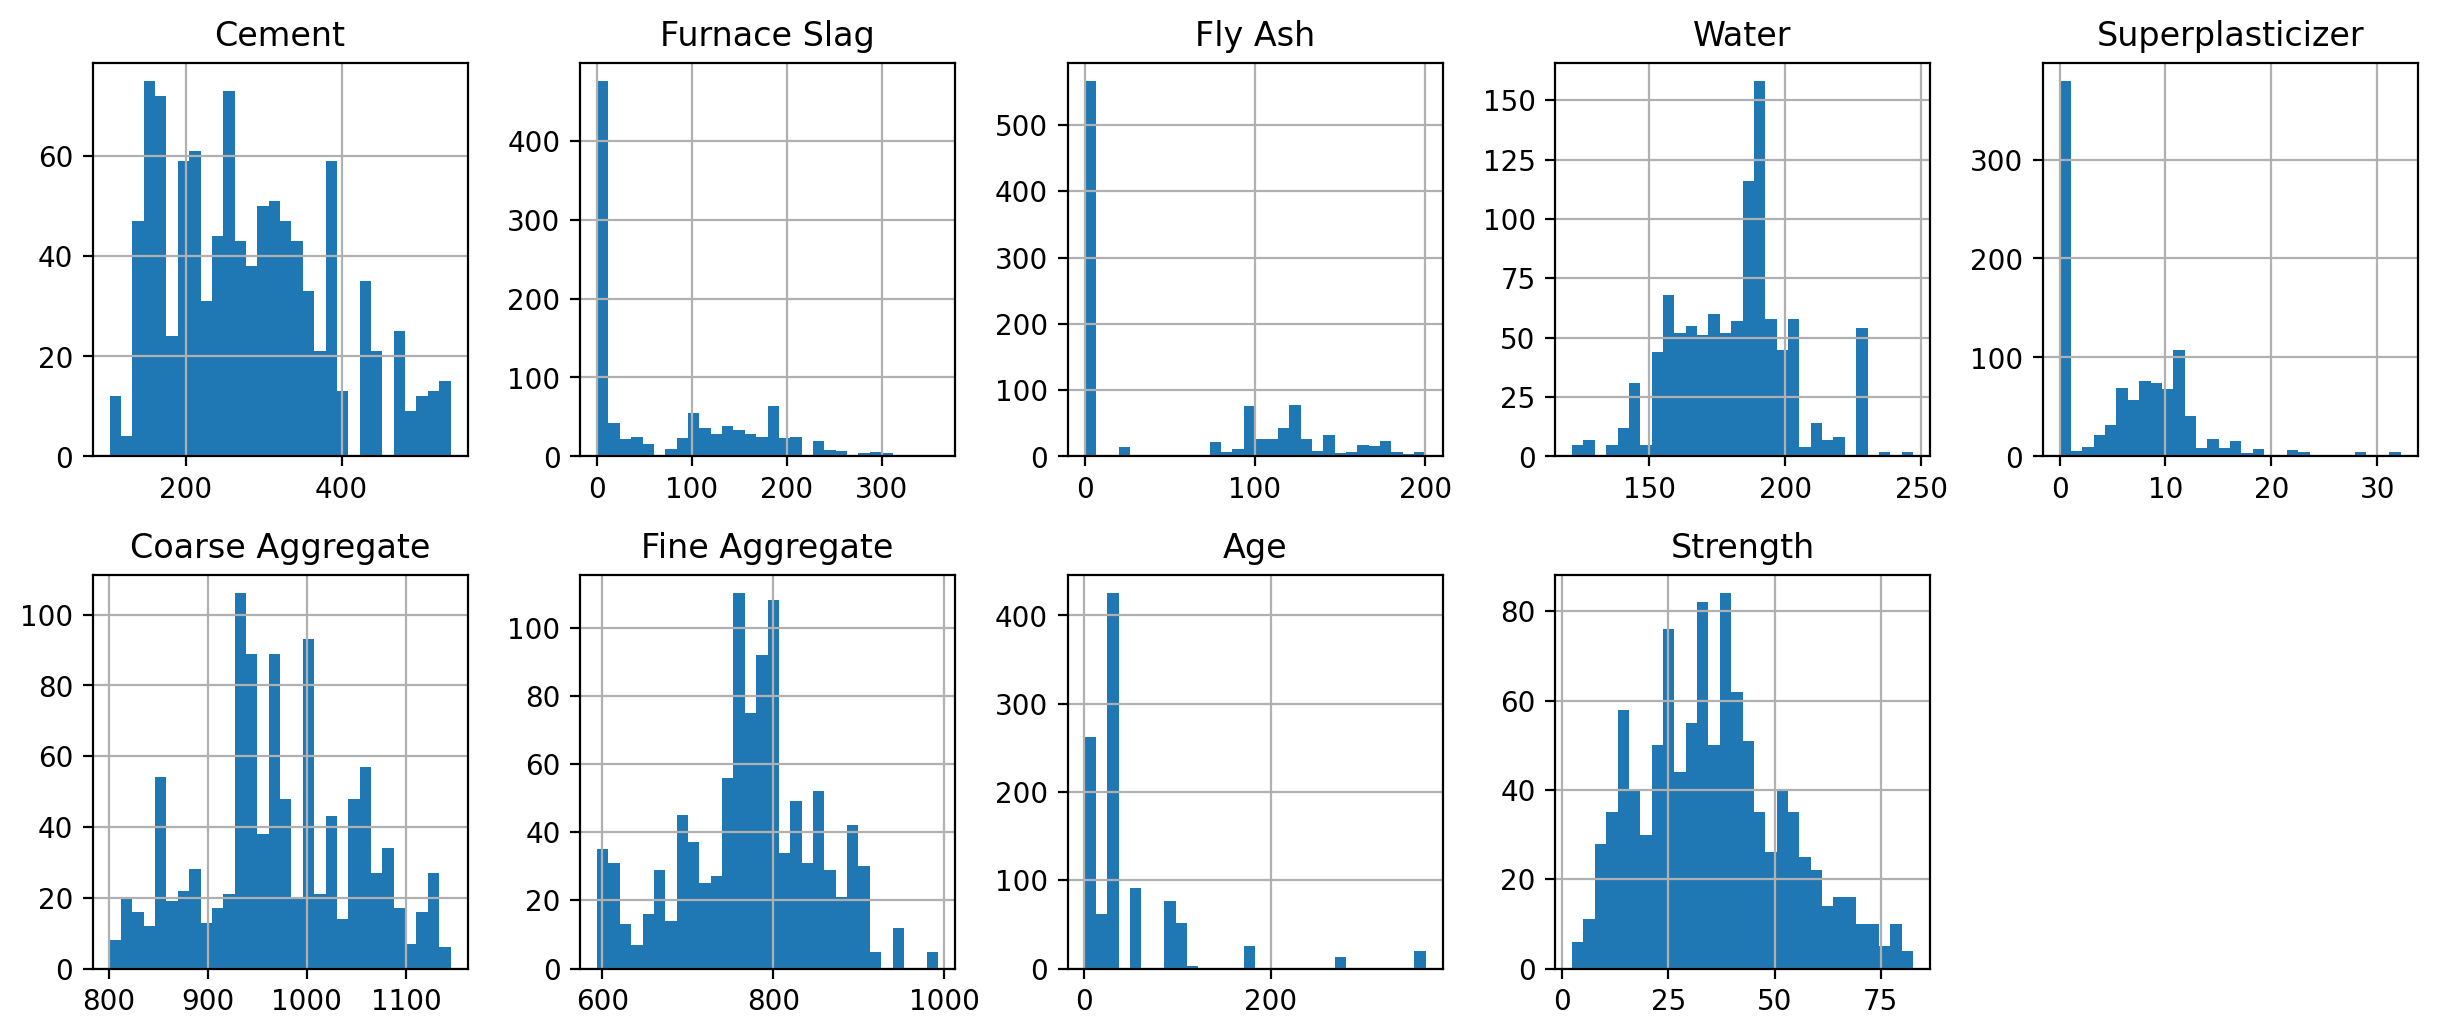

In [49]:
data.hist(data.columns, layout=(2, 5), figsize=(15, 6), bins=30)
pass

Распределения признаков. Имеется много элементов с Furnace Slag, Fly Ash, Superplasticizer равными 0, но так как их больше половины, не будем обрабатывать их как выбросы

In [12]:
data.describe()

Cement  Furnace Slag      Fly Ash        Water  Superplasticizer  \
count  1030.000000   1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.165631     73.895485    54.187136   181.566359          6.203112   
std     104.507142     86.279104    63.996469    21.355567          5.973492   
min     102.000000      0.000000     0.000000   121.750000          0.000000   
25%     192.375000      0.000000     0.000000   164.900000          0.000000   
50%     272.900000     22.000000     0.000000   185.000000          6.350000   
75%     350.000000    142.950000   118.270000   192.000000         10.160000   
max     540.000000    359.400000   200.100000   247.000000         32.200000   

       Coarse Aggregate  Fine Aggregate          Age     Strength  
count       1030.000000     1030.000000  1030.000000  1030.000000  
mean         972.918592      773.578883    45.662136    35.817836  
std           77.753818       80.175427    63.169912    16.705679  
min          801.000000      594.000000     1.000000     2.331808  
25%          932.000000      730.950000     7.000000    23.707115  
50%          968.000000      779.510000    28.000000    34.442774  
75%         1029.400000      824.000000    56.000000    46.136287  
max         1145.000000      992.600000   365.000000    82.599225

In [13]:
data.corr()

Cement  Furnace Slag   Fly Ash     Water  \
Cement            1.000000     -0.275193 -0.397475 -0.081544   
Furnace Slag     -0.275193      1.000000 -0.323569  0.107286   
Fly Ash          -0.397475     -0.323569  1.000000 -0.257044   
Water            -0.081544      0.107286 -0.257044  1.000000   
Superplasticizer  0.092771      0.043376  0.377340 -0.657464   
Coarse Aggregate -0.109356     -0.283998 -0.009977 -0.182312   
Fine Aggregate   -0.222720     -0.281593  0.079076 -0.450635   
Age               0.081947     -0.044246 -0.154370  0.277604   
Strength          0.497833      0.134824 -0.105753 -0.289613   

                  Superplasticizer  Coarse Aggregate  Fine Aggregate  \
Cement                    0.092771         -0.109356       -0.222720   
Furnace Slag              0.043376         -0.283998       -0.281593   
Fly Ash                   0.377340         -0.009977        0.079076   
Water                    -0.657464         -0.182312       -0.450635   
Superplasticizer          1.000000         -0.266303        0.222501   
Coarse Aggregate         -0.266303          1.000000       -0.178506   
Fine Aggregate            0.222501         -0.178506        1.000000   
Age                      -0.192717         -0.003016       -0.156094   
Strength                  0.366102         -0.164928       -0.167249   

                       Age  Strength  
Cement            0.081947  0.497833  
Furnace Slag     -0.044246  0.134824  
Fly Ash          -0.154370 -0.105753  
Water             0.277604 -0.289613  
Superplasticizer -0.192717  0.366102  
Coarse Aggregate -0.003016 -0.164928  
Fine Aggregate   -0.156094 -0.167249  
Age               1.000000  0.328877  
Strength          0.328877  1.000000

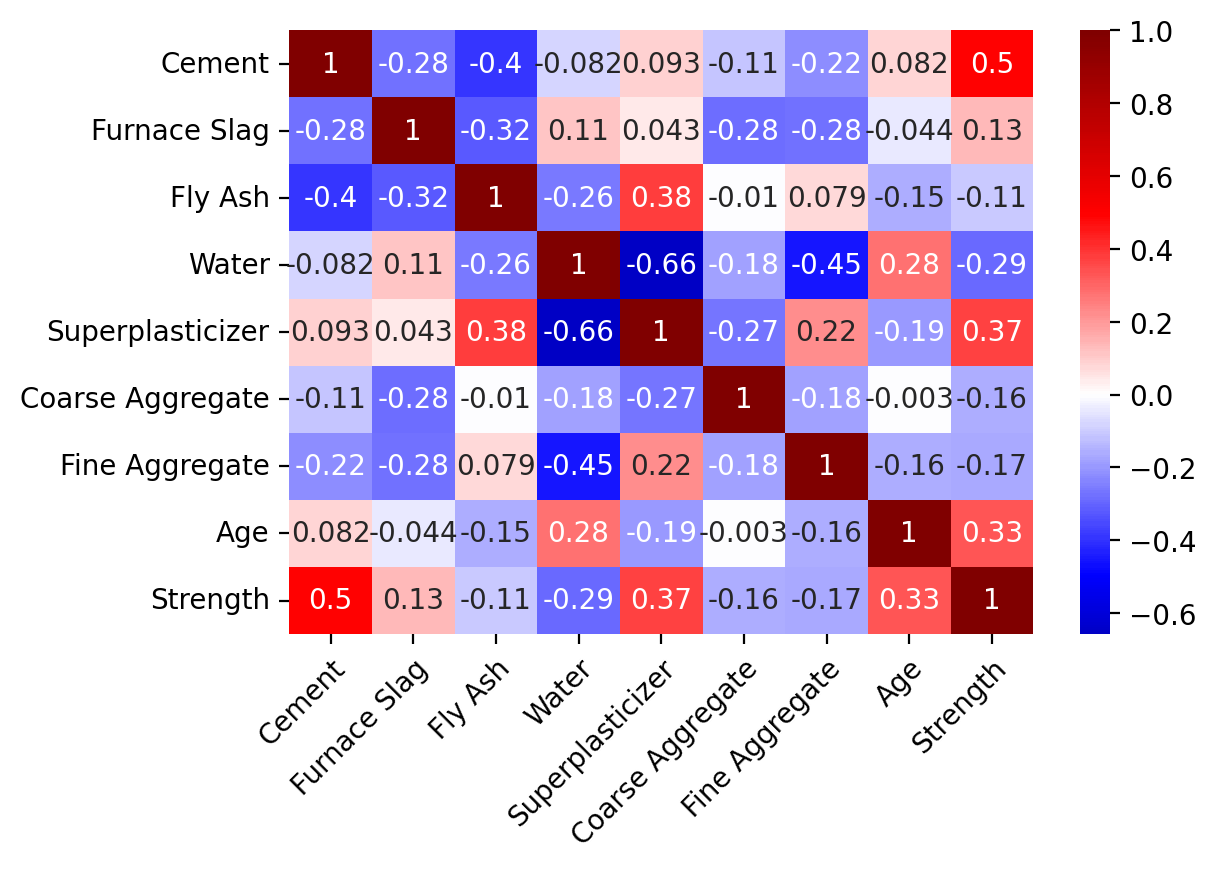

In [23]:
ax = plt.gcf().gca()
sns.heatmap(data.corr(), annot=True, center=0, cmap='seismic', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
pass

Мультиколлинеарность выражена слабо

In [24]:
data.corrwith(data['Strength']).sort_values()

Water              -0.289613
Fine Aggregate     -0.167249
Coarse Aggregate   -0.164928
Fly Ash            -0.105753
Furnace Slag        0.134824
Age                 0.328877
Superplasticizer    0.366102
Cement              0.497833
Strength            1.000000
dtype: float64

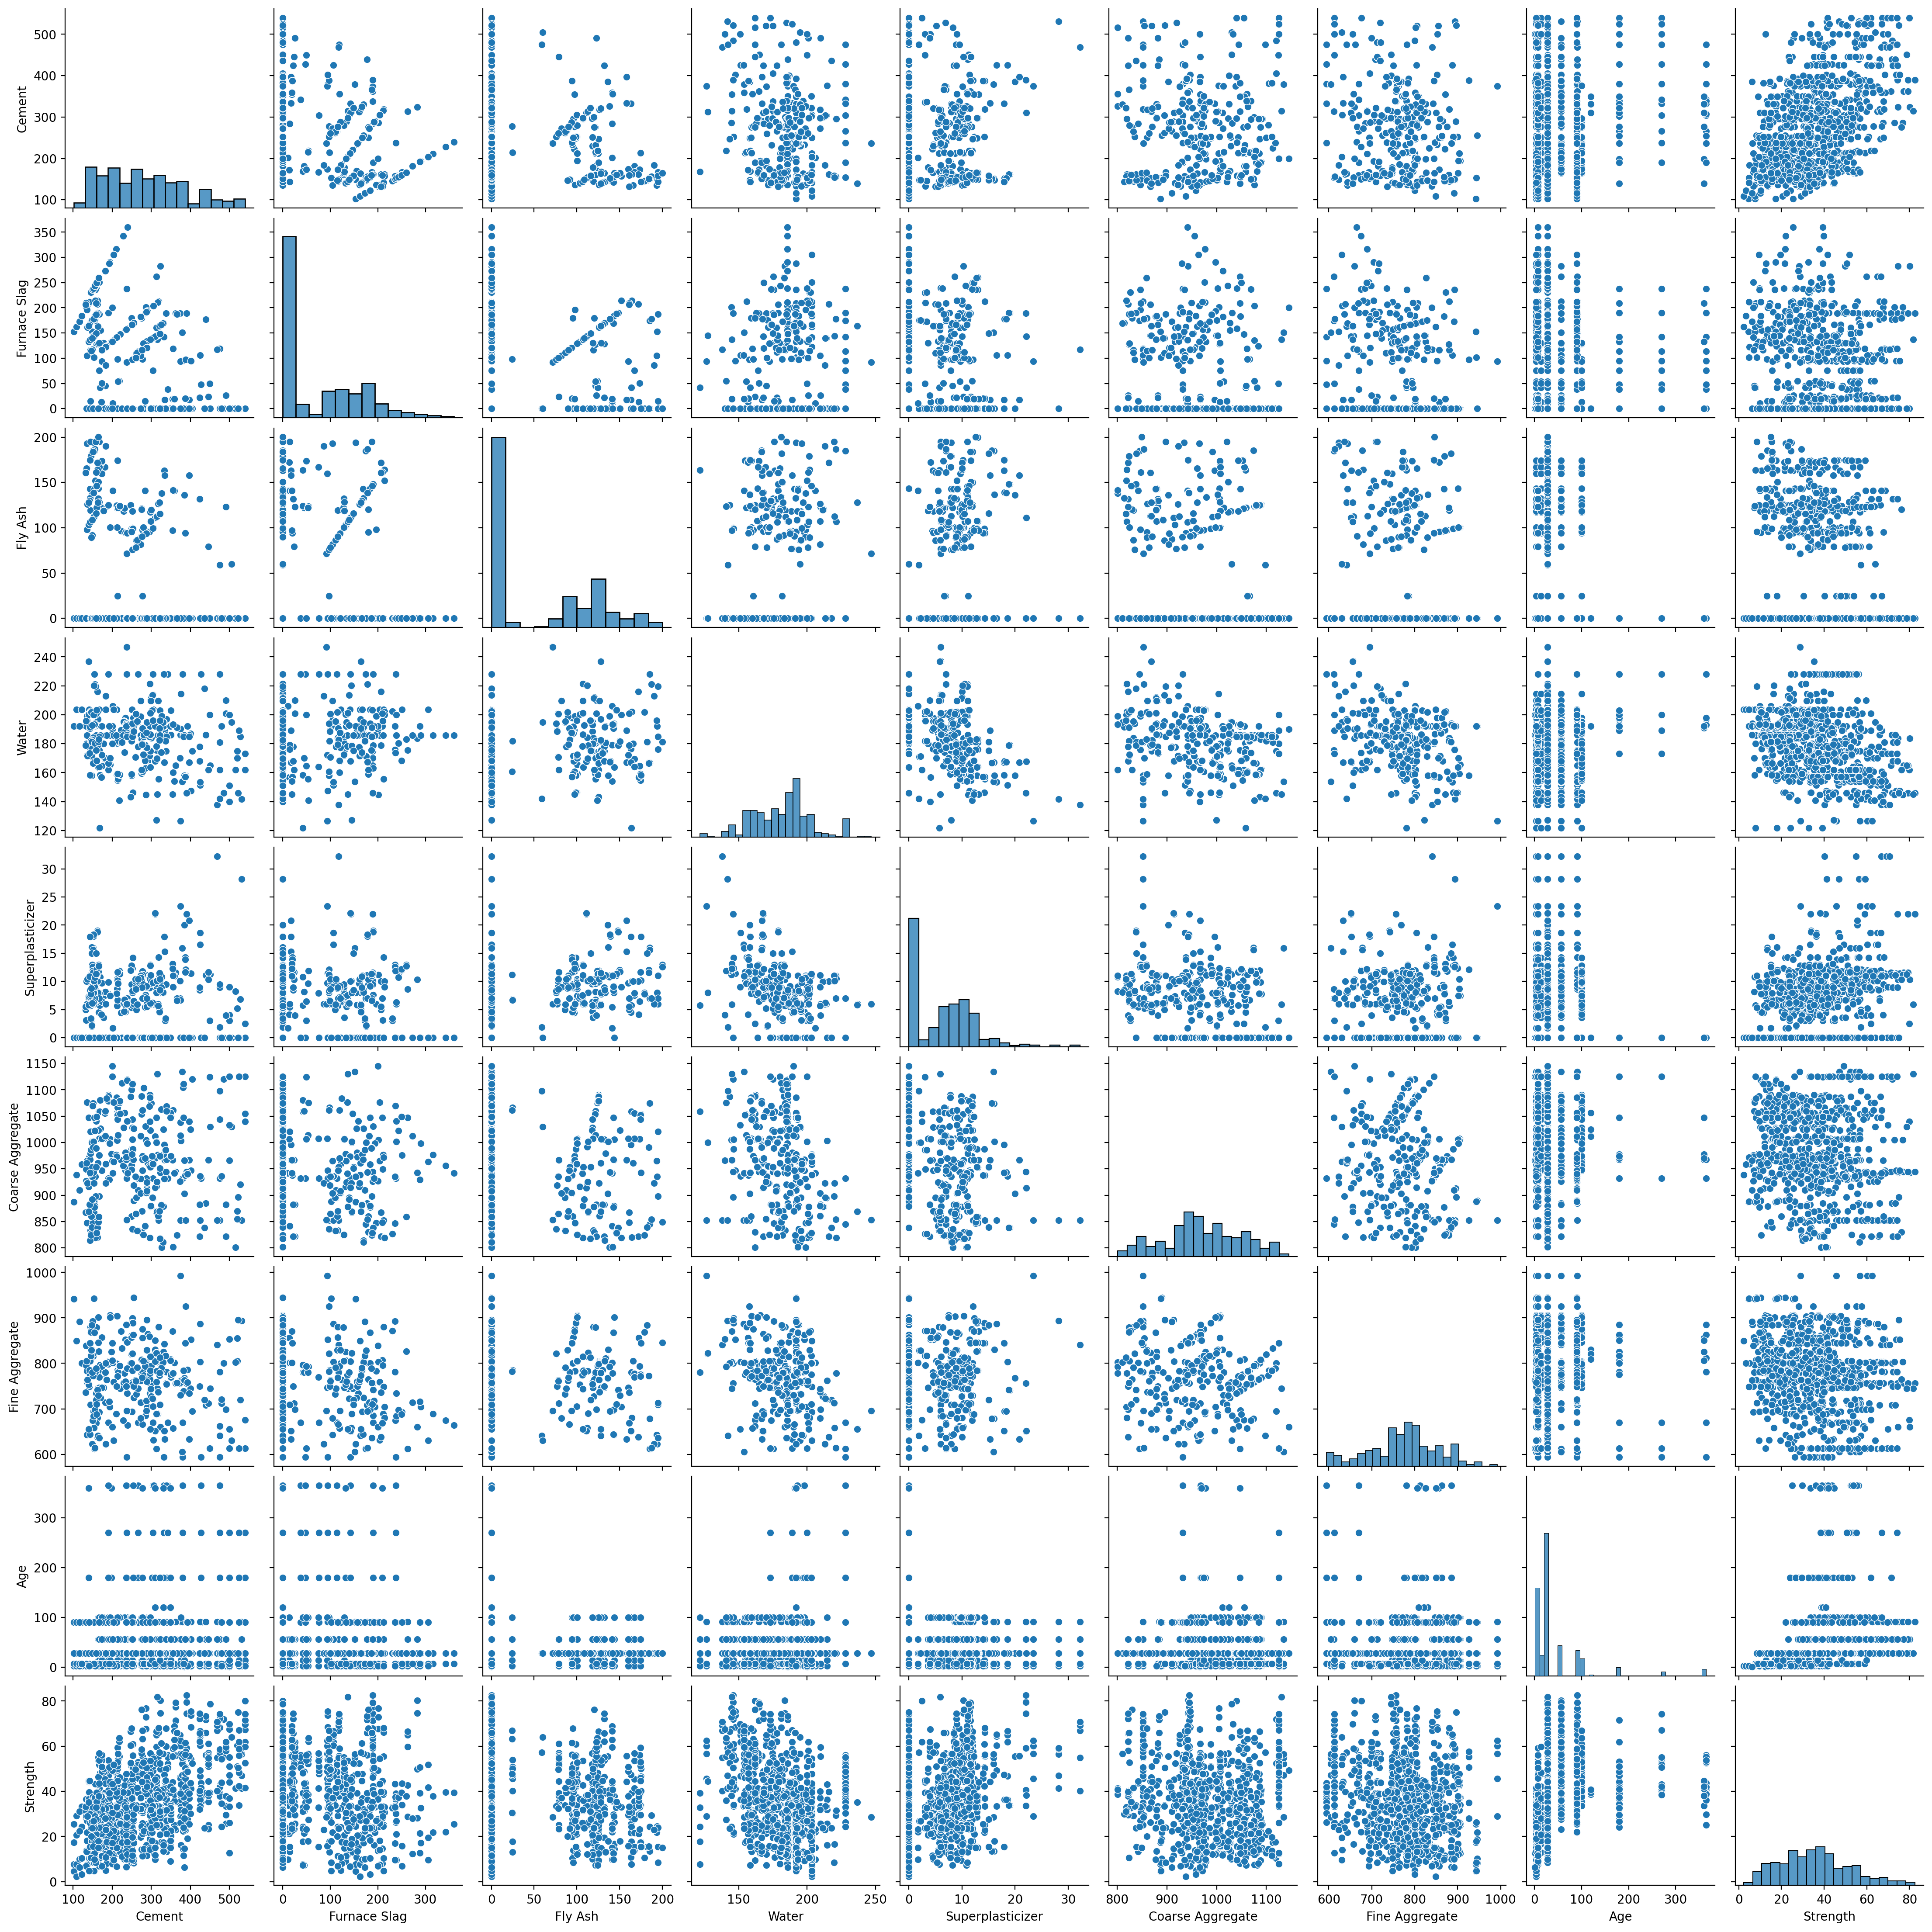

In [15]:
sns.pairplot(data=data)
pass

Попарная визуализация признаков

In [15]:
x = data.drop(columns = 'Strength').to_numpy()
y = data['Strength'].to_numpy()
train_data, test_data, train_target, test_target = train_test_split(x, y, train_size=0.8, random_state=1)

## Реализация моделей

### Дерево решений

In [16]:
class DecisionTree(BaseEstimator, RegressorMixin):
    class Node:
        def __init__(self):
            self.feature = -1
            self.value = None
            self.left = None
            self.right = None
    
    def __init__(self, min_leaf_size=5, max_depth=None, criterion='mse', answer='mean', features=None):
        self.min_leaf_size = min_leaf_size
        self.max_depth = max_depth
        self.criterion = criterion
        self.answer = answer
        self.features = features
    
    def fit(self, data, target):
        self.root = self.Node()
        self.process_node(data, target, self.root, np.arange(len(target)), 0)
        return self
    
    def crit(self, y_sum, y_sq_sum, y_med_sum, n):
        if self.criterion == 'mse':
            return y_sq_sum / n - y_sum ** 2 / n ** 2
        elif self.criterion == 'mae':
            return y_med_sum / n 
        elif self.criterion == 'poisson':
            return -y_sum / n * np.log(y_sum / n)
        
    def process_node(self, data, target, node, ids, depth):
        X = data[ids]
        Y = target[ids]
        n = len(X)
        y_sum = np.sum(Y)
        y_sq_sum = np.sum(Y ** 2)
        y_med = np.median(Y)
        y_med_sum = np.sum(np.abs(Y - y_med))
        
        if (self.max_depth is not None) and depth == self.max_depth or \
           (self.min_leaf_size is not None) and n <= self.min_leaf_size:
            if self.answer == 'mean':
                node.value = y_sum / n
            elif self.answer == 'median':
                node.value = y_med
            return
        
        h = self.crit(y_sum, y_sq_sum, y_med_sum, n)
        max_value = None
        max_f = None
        max_gain = -1
        best_left_ids = None
        best_right_ids = None
        for f in (self.features if self.features is not None else range(data.shape[1])):
            sort_ids = X[:, f].argsort()
            left = 1
            left_sum = Y[sort_ids[0]]
            left_sq_sum = Y[sort_ids[0]] ** 2
            left_med_sum = np.abs(Y[sort_ids[0]] - y_med)

            while left < n:
                while left < n and X[sort_ids[left-1]][f] == X[sort_ids[left-2]][f]:
                    left += 1
                    left_sum += Y[sort_ids[left-1]]
                    left_sq_sum += Y[sort_ids[left-1]] ** 2
                    left_med_sum += np.abs(Y[sort_ids[left-1]] - y_med)
                if left == n:
                    break
                    
                left_h = self.crit(left_sum, left_sq_sum, left_med_sum, left)
                right_h = self.crit(y_sum - left_sum, y_sq_sum - left_sq_sum, y_med_sum - left_med_sum, n - left)

                gain = h - (left * left_h + (n - left) * right_h) / n
                if gain > max_gain:
                    max_gain = gain
                    max_value = X[sort_ids[left-1]][f]
                    max_f = f
                    best_left_ids = sort_ids[:left]
                    best_right_ids = sort_ids[left:]

                left += 1
                left_sum += Y[sort_ids[left-1]]
                left_sq_sum += Y[sort_ids[left-1]] ** 2
                left_med_sum += np.abs(Y[sort_ids[left-1]] - y_med)
        
        if max_value is None:
            if self.answer == 'mean':
                node.value = y_sum / n
            elif self.answer == 'median':
                node.value = y_med
            return
        
        node.feature = max_f
        node.value = max_value
        node.left = self.Node()
        node.right = self.Node()
        
        self.process_node(X, Y, node.left, best_left_ids, depth+1)
        self.process_node(X, Y, node.right, best_right_ids, depth+1)
        
    def predict(self, data):
        res = np.ndarray(data.shape[0])
        for i, obj in enumerate(data):
            node = self.root
            while node.feature != -1:
                if obj[node.feature] > node.value:
                    node = node.right
                else:
                    node = node.left
            res[i] = node.value
        return res

### Градиентный бустинг

In [17]:
class GradientBoosting(BaseEstimator, RegressorMixin):
    def __init__(self, loss='mse', n_estimators=100, lr=0.1, max_features=1, subsample=1, **estimator_params):
        self.loss = loss
        self.n_estimators = n_estimators
        self.lr = lr
        self.max_features = max_features
        self.subsample = subsample
        self.estimator_params = estimator_params
        
    def negative_gradient(self, target, pred):
        if self.loss == 'mse':
            return target - pred
    
    def fit(self, data, target):
        features = np.arange(data.shape[1])
        if self.max_features == 'sqrt':
            max_features = int(np.floor(np.sqrt(len(features))))
        else:
            max_features = int(np.floor(len(features) * self.max_features))
        indexes = np.arange(len(data))
        samples = int(np.floor(self.subsample * len(data)))
        
        self.estimators = []
        pred = np.zeros(data.shape[0])
        for _ in range(self.n_estimators):
            if (self.max_features < 1):
                np.random.shuffle(features)
                
            self.estimators.append(DecisionTree(features=features[:max_features], **self.estimator_params))
            cur_target = self.negative_gradient(target, pred)
            if self.subsample < 1:
                idx = np.random.choice(indexes, (samples, ), replace=False)
                self.estimators[-1].fit(data[idx], cur_target[idx])
            else:
                self.estimators[-1].fit(data, cur_target)
            pred += self.lr * self.estimators[-1].predict(data)
        return self
    
    def predict(self, data):
        pred = np.zeros(data.shape[0])
        for tree in self.estimators:
            pred += self.lr * tree.predict(data)
        return pred

## Обучение и тестирование моделей

In [18]:
def scores_regr(model, data, target):
    pred = model.predict(data)
    print("Max error:", max_error(target, pred))
    print("MAE:", mean_absolute_error(target, pred))
    print("MSE:", mean_squared_error(target, pred))
    print("R^2:", r2_score(target, pred))
    fig = plt.figure(figsize=(4.5, 4.5))
    fig.add_subplot(111, aspect='equal')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.axline((0, 0), (1, 1), ls='--', c='grey')
    plt.scatter(target, pred, marker='o', s=16)
    plt.show()

Определим гиперпараметры одиночного дерева

In [19]:
dt_cv = GridSearchCV(Pipeline([('scaler', Normalizer()), ('tree', DecisionTree())]), 
                     {'tree__criterion': ['mse', 'poisson'], 'tree__max_depth': [5, 20, 50, None], 
                      'tree__min_leaf_size': [1, 5, 10], 'tree__answer': ['mean', 'median']}, verbose=1, n_jobs=4)
dt_cv.fit(train_data, train_target)
print(dt_cv.best_params_, dt_cv.best_score_, sep='\n')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'tree__answer': 'mean', 'tree__criterion': 'mse', 'tree__max_depth': 20, 'tree__min_leaf_size': 5}
0.7521049683849069


Max error: 41.984262068
MAE: 5.772610978436216
MSE: 73.80822161902006
R^2: 0.7168804103896775


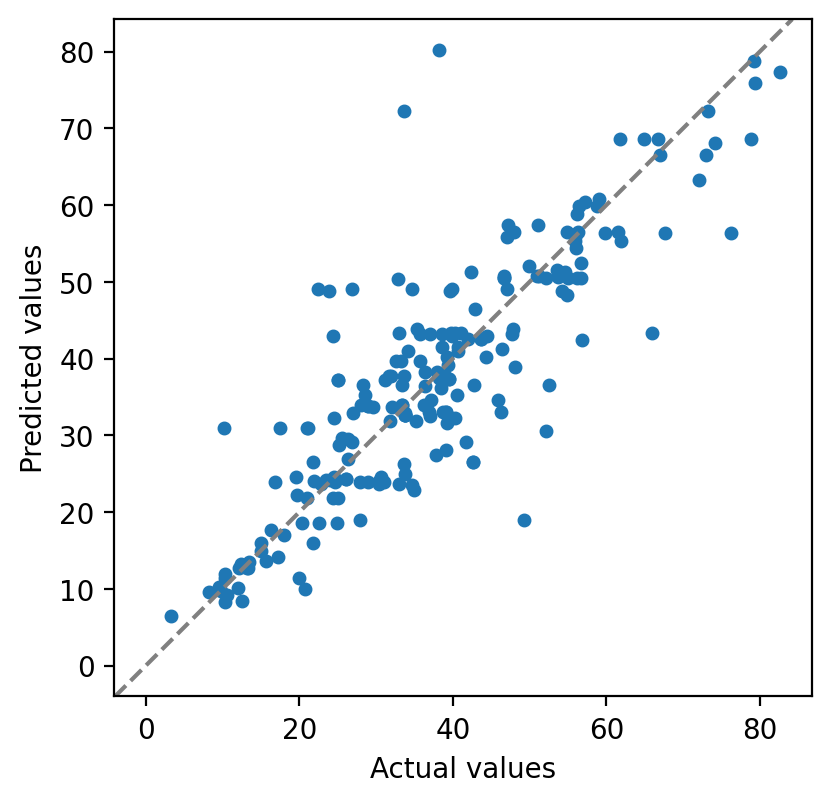

In [20]:
dt = dt_cv.best_estimator_
scores_regr(dt, test_data, test_target)

Сравним с деревом из sklearn

Max error: 46.51205096
MAE: 5.184229691927071
MSE: 67.95003686449105
R^2: 0.7393517127348934


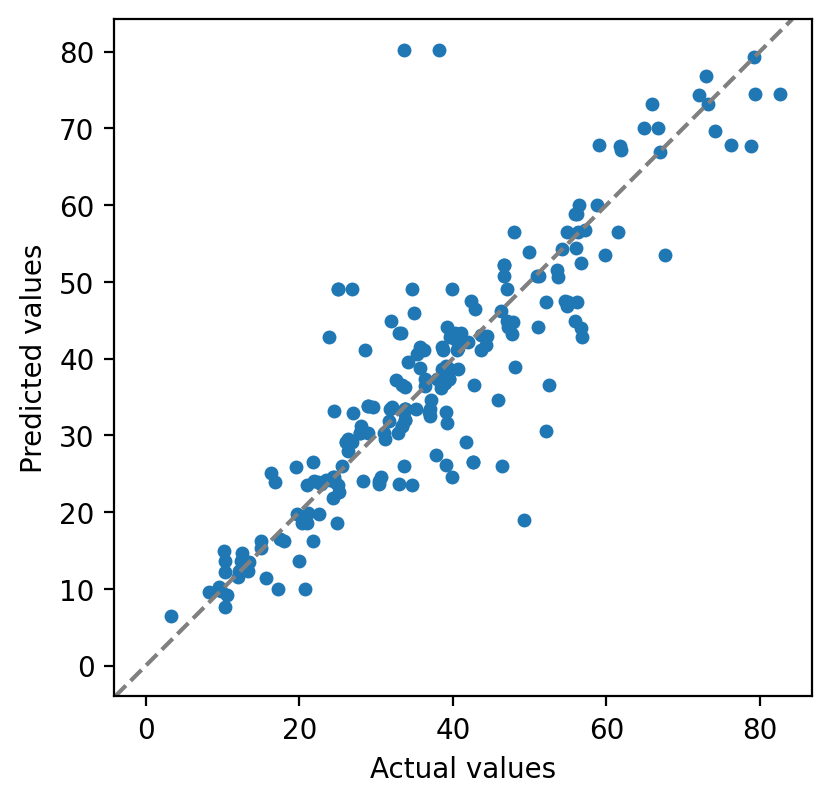

In [21]:
sk_dt = Pipeline([('scaler', Normalizer()), ('tree', DecisionTreeRegressor(criterion='squared_error', max_depth=20, min_samples_leaf=1, min_samples_split=5, random_state=1))])
sk_dt.fit(train_data, train_target)
scores_regr(sk_dt, test_data, test_target)

Определим гипепараметры градиентного бустинга. В качестве параметров дерева используем найденные ранее

In [44]:
gb_cv = GridSearchCV(Pipeline([('scaler', Normalizer()), ('gbdt', GradientBoosting(criterion='mse', max_depth=20, min_leaf_size=5, answer='mean'))]), 
                     {'gbdt__n_estimators': [30, 80, 100], 'gbdt__lr': [0.01, 0.1, 0.5]}, verbose=1, n_jobs=4)
gb_cv.fit(train_data, train_target)
print(gb_cv.best_params_, gb_cv.best_score_, sep='\n')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'gbdt__lr': 0.1, 'gbdt__n_estimators': 80}
0.8344084213129582


Max error: 31.774143301871298
MAE: 4.478631496353804
MSE: 48.81379503539908
R^2: 0.8127560681643196


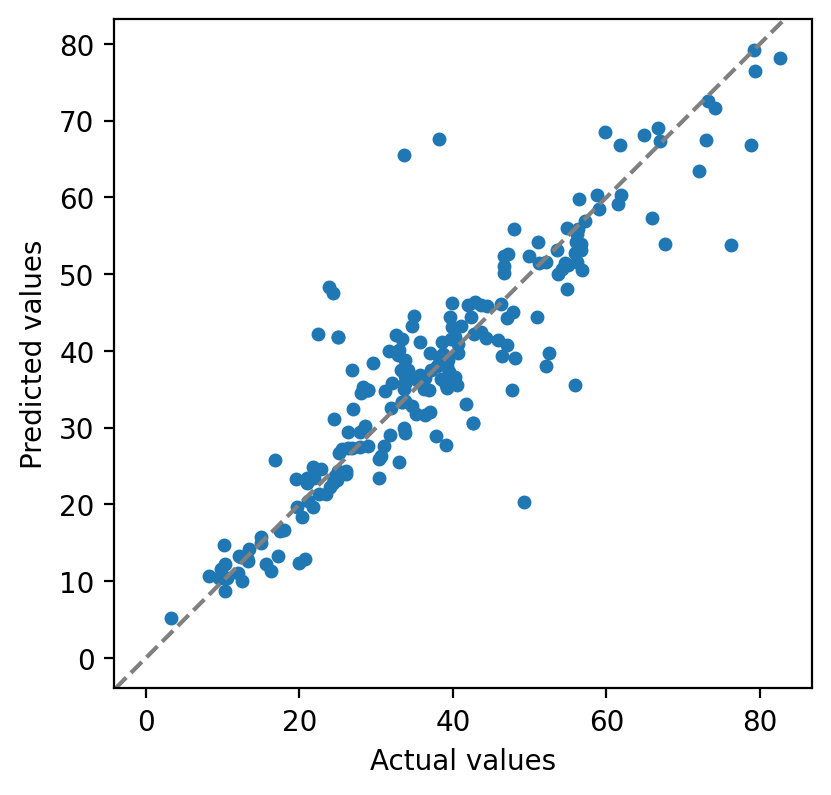

In [31]:
gb = gb_cv.best_estimator_
scores_regr(gb, test_data, test_target)

Сравним с градиентным бустингом из sklearn

Max error: 33.91509690631327
MAE: 4.3520166876996775
MSE: 48.64598127503272
R^2: 0.8133997818580478


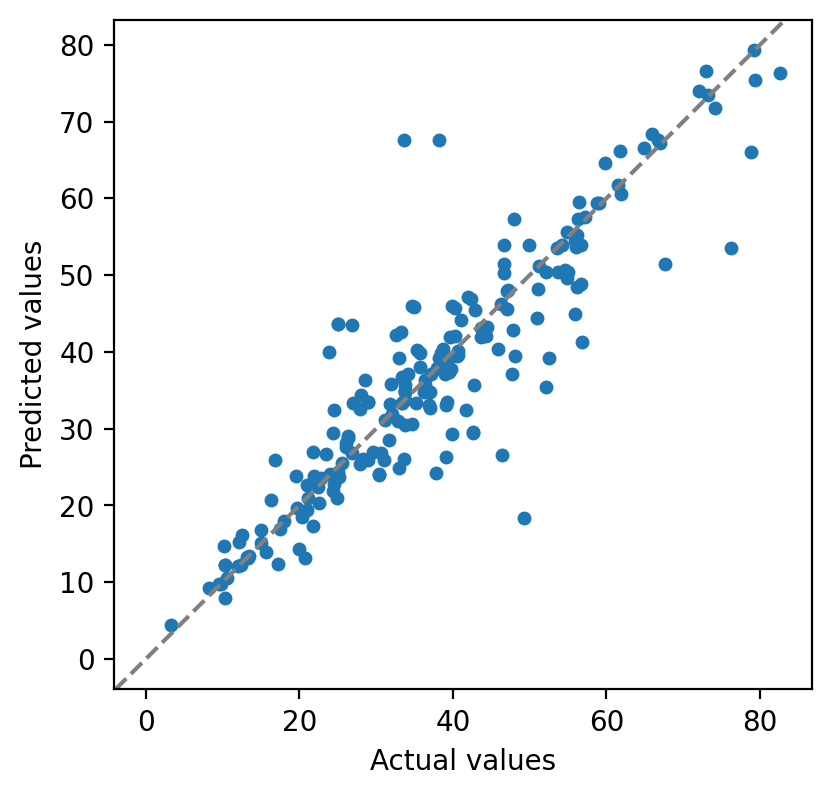

In [34]:
sk_gb = Pipeline([('scaler', Normalizer()), ('gbdt', GradientBoostingRegressor(n_estimators=80, learning_rate=0.1, criterion='squared_error', max_depth=20, min_samples_split=5, min_samples_leaf=1, random_state=1))])
sk_gb.fit(train_data, train_target)
scores_regr(sk_gb, test_data, test_target)